In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

In [65]:
import nltk
import pandas as pd
from pandas import DataFrame, Series
import PyPDF2
from PyPDF2 import PdfFileReader
import math
import requests
import regex as re
import datetime
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import nltk
from nltk import corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from datetime import datetime

In [2]:
meeting = DataFrame(pd.read_csv("Board Committee Commission Meeting Data.csv"))
agendas = meeting['Agenda_Link']
notes = meeting['Minutes_Link']

In [3]:
for i in range(len(meeting)):
    new = re.sub(r"\s", "", meeting['Meeting_ID'][i])
    meeting['Meeting_ID'][i] = new

<ipython-input-3-77a6d85d7f34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meeting['Meeting_ID'][i] = new


download **agenda** pdfs with the request module

In [4]:
# for i, url in enumerate(agendas):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_agendas/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

download **notes** pdfs with the request module

In [5]:
# for i, url in enumerate(notes):
#     try:
#         r = requests.get(url)
#         r.raise_for_status()
#     except Exception:
#         continue
#     text = "pdf_notes/{}.pdf"
#     with open(text.format(meeting.iloc[i,0]),'wb') as f:
#         f.write(r.content)

In [6]:
meeting['Duration_minutes'] = meeting['Duration'] #copy a column so that I have one to replace with the cell below

In [7]:
for i in range(len(meeting['Duration'])):
    time = re.split(':',meeting['Duration'][i])
    time = [int(x) for x in time]
    seconds = time[0]*60 + time[1] + time[0]/60
    meeting.iloc[i,10] = seconds

In [8]:
meeting

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067
...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033


Coef: [0.33873689]
Intercept: -10.849966498419846
Number of Participants ~= 0.3387368917661893*Duration_minutes + -10.849966498419846


Text(0.5, 1.0, 'Participants by Meeting Duration')

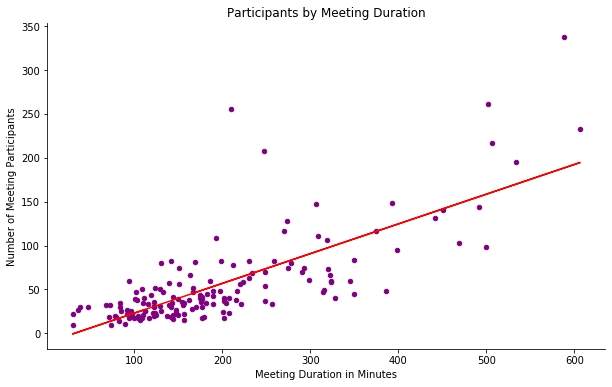

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(x='Duration_minutes', y = 'Participants', ax=ax, color='purple')

X=meeting['Duration_minutes'].values.reshape(-1, 1)
y=meeting['Participants'].values

r = LinearRegression()
r.fit(X, y)
plt.plot(X, r.predict(X),color='r')

print("Coef:", r.coef_)
print("Intercept:", r.intercept_)

def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0], columns[i])
    rv += str(r.intercept_)
    return rv

print("Number of Participants ~= " + formula(r, ['Duration_minutes']))

ax.set_xlabel("Meeting Duration in Minutes")
ax.set_ylabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Participants by Meeting Duration')

In [10]:
def get_xterms(x):
    t = pd.DataFrame({"x":x})
#     t['x**2'] = t['x']**2
#     t['x**3'] = t['x']**3
    t['logx'] = np.log(t['x'])
    t['log2x'] = np.log2(t['x'])
    return t

poly_df=get_xterms(meeting['Participants'])

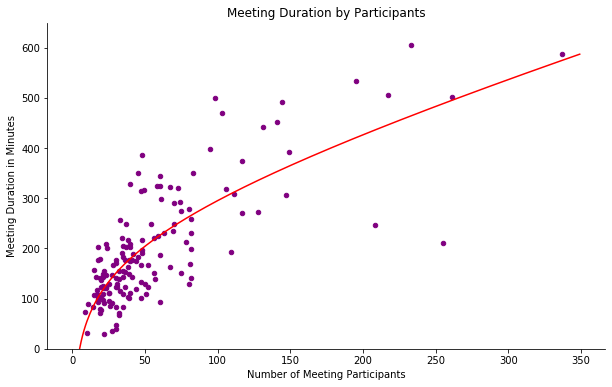

In [124]:
fig, ax = plt.subplots(figsize = (10,6))
meeting.plot.scatter(y='Duration_minutes', x = 'Participants', ax=ax, color='purple')
ax.set_ylabel("Meeting Duration in Minutes")
ax.set_xlabel("Number of Meeting Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Meeting Duration by Participants')
ax.set_ylim(0,650)

lr = LinearRegression()
lr.fit(poly_df, meeting[['Duration_minutes']])
x = np.arange(0.1,350,1)
ax.plot(x, lr.predict(get_xterms(x)),'r')
plt.savefig('meeting_participants.png')


Next Steps: Can we predict Meeting Duration by estimating number of participants or vice versa? 

**Extracting Text from PDF and Tokenizing**

Extracting text from PDFs and adding column for each **agenda**

In [13]:
# with open(path, 'rb') as f:
#         pdf = PdfFileReader(f, strict='False')
#         info = pdf.getDocumentInfo()
#         number_of_pages = pdf.getNumPages()

text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_agendas/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['text']=text_list





In [16]:
text_dict = {}
text_list = []
for x in meeting['Meeting_ID']:
    try:
        pdfFileObject = open('pdf_notes/'+x+'.pdf','rb')
        pdfReader = PdfFileReader(pdfFileObject)
        pageObject = pdfReader.getPage(0)
        number_of_pages = pdfReader.getNumPages()
        txt = ''
    except Exception:
        text_list.append("N/A")
        continue
    for i in range(number_of_pages):
        pageObject = pdfReader.getPage(i)
        txt+= pageObject.extractText()
    text_dict[x] = txt
    text_list.append(txt)
meeting['note_text']=text_list


In [39]:
# meeting['agenda_key']=meeting['text']
# meeting['note_key']=meeting['text']
# meeting.so

,Meeting_ID,Topic,Scheduled_Start_Time,Zoom_Meeting_Start_Time,Zoom_Meeting_End_Time,Duration,Participants,Recording,Agenda_Link,Minutes_Link,Duration_minutes,text,note_text,agenda_key,note_key
0,954410442,CCEC,4:30:00 PM,3/31/2020 15:40,6:27 PM,2:47:55,52,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,167.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[committee, council, madison, public, city, co...","[ald, city, council, committee, kemble, bidar,..."
1,531697510,Common Council,6:30:00 PM,3/31/2020 17:04,02:53 AM(Next day),9:48:36,337,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,588.15,COMMON COUNCILCity of MadisonAgenda - AmendedC...,"City of MadisonMadison, WI 53703www.cityofmad...","[sponsors, plans, planning, plan, planned, pub...","[sponsors, streets, street, res, city, approve..."
2,411578576,"Finance Committee: Meeting of April 6, 2020",4:30:00 PM,4/6/2020 15:40,5:49 PM,2:09:00,31,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,129.033,FINANCE COMMITTEECity of MadisonAgenda - Appro...,"City of MadisonMadison, WI 53703www.cityofmad...","[finance, meeting, covid, city, program, trans...","[motion, bidar, moreland, meter, mckinney, com..."
3,563608269,"CCEC: Meeting of April 9, 2020",6:00:00 PM,4/9/2020 16:57,7:53 PM,2:56:08,36,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,176.033,COMMON COUNCIL EXECUTIVE COMMITTEECity of Madi...,"City of MadisonMadison, WI 53703www.cityofmad...","[comments, comment, city, meeting, meetings, c...","[ald, information, informative, staff, eoc, co..."
4,468948855,"Plan Commission: Meeting of April 13, 2020",5:30:00 PM,4/13/2020 16:35,9:14 PM,4:38:54,80,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,278.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[building, buildings, plan, planning, plans, p...","[police, update, chief, public, minutes, motio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,93491014777,Public Safety Review Committee Budget Subcommi...,NaN,7/29/2020 17:46,8:17 PM,2:30:50,21,Yes,NaN,NaN,150.033,N/A,N/A,[],[]
151,98563848547,"Plan Commission: Meeting of July 30, 2020",5:00:00 PM,7/30/2020 15:58,8:06 PM,4:08:29,54,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,248.067,PLAN COMMISSIONCity of MadisonAgenda - Approve...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, plan, planning, city, comments, comm...","[meeting, meetings, plan, planning, zellers, m..."
152,99885787121,Body-Worn Camera Feasibility Review Committee:...,5:30:00 PM,7/30/2020 17:06,7:35 PM,2:28:11,23,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,148.033,BODY-WORN CAMERA FEASIBILITY REVIEW COMMITTEEC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, meetings, discussion, pdf, committee...","[committee, costs, cost, body, video, vendor, ..."
153,94972195424,Task Force on Municipal Golf in Madison Parks:...,6:00:00 PM,7/30/2020 17:35,8:24 PM,2:49:27,81,Yes,https://madison.legistar.com/View.ashx?M=A&ID=...,https://madison.legistar.com/View.ashx?M=M&ID=...,169.033,TASK FORCE ON MUNICIPAL GOLF IN MADISON PARKSC...,"City of MadisonMadison, WI 53703www.cityofmad...","[meeting, madison, comments, comment, public, ...","[golf, city, kopp, minutes, motion, henak, for..."


In [25]:
from gensim.summarization import keywords
import warnings

tokenized_agenda = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-4]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_agenda.append(list(data['keyword']))
meeting['agenda_key'] = tokenized_agenda

In [28]:
tokenized_note = []
for i in range(len(meeting['Meeting_ID'])):
    text=meeting.iloc[i,-3]
    warnings.filterwarnings("ignore")

    values = keywords(text=text,split='\n',scores=True)

    data = pd.DataFrame(values,columns=['keyword','score'])
    data = data.sort_values('score',ascending=False)
    tokenized_note.append(list(data['keyword']))
meeting['note_key'] = tokenized_note

In [89]:
# meeting.iloc[0,-2]
# meeting.sort_values(by=['Participants'], ascending=False).head(10)

**DONT DO THIS UNTIL AFTER YOU ADDED NOTES AND AGENDA TEXT ABOVE BECAUSE OF INDEXING ILOC IS HARDCODED**

In [87]:
dates = []
for i in meeting['Zoom_Meeting_Start_Time']:
    unformatted = i.split()[0]
    datetime = datetime.strptime(unformatted , '%m/%d/%Y')
    dates.append(datetime)
    
day_of_week = [x.strftime("%A") for x in dates]
meeting['day_of_week']=day_of_week

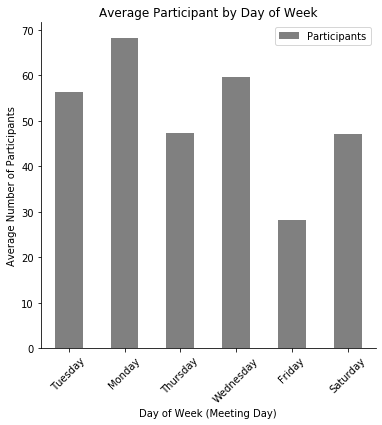

In [122]:
fig, ax = plt.subplots(figsize=(6,6))
meeting.groupby('day_of_week',sort=False).mean().plot.bar(ax=ax, color= "gray")
ax.set_xlabel("Day of Week (Meeting Day)")
ax.set_ylabel("Average Number of Participants")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Average Participant by Day of Week')
plt.xticks(rotation=45) 
plt.savefig('meetin_by_day.png')

Possibility: Off-days such as Friday, Saturday, and Sunday 